In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [108]:
Dots = pd.read_csv('Data_Level4_UMDOTS_CampusTrafficCount.csv')

In [70]:
Dots.sample(5)

,time,pedestrians,bicyclists,cars,buses,trucks,location
10652,2019-11-09T16:00:00-04:00,279,6,645,10,4,South_Gate_South_View
4472,2019-11-01T11:00:00-04:00,399,184,213,23,41,Regents_Dr_&_Stadium_Dr_1
6160,2019-11-05T00:00:00-04:00,9,0,17,2,0,Regents_Dr_&_Stadium_Dr_2
11617,2019-11-05T16:15:00-04:00,432,96,92,7,8,Stadium_Dr_East_Of_Regents_Dr
4659,2019-11-03T09:45:00-04:00,16,40,32,4,1,Regents_Dr_&_Stadium_Dr_1


![title](dots_sensor.jpg)

![title](map.jpg)

In [109]:
Dots['Date'] = Dots['time'].str[:10]
Dots['Date'] = pd.to_datetime(Dots['Date'])
#pd.to_datetime(Dots['Date'], format='%Y%m%d')

In [110]:
Dots['time'] = pd.to_datetime(Dots['time'].str[:10]+' '+Dots['time'].str[11:19])

In [111]:
Dots['StartTime'] = Dots['time'].apply(lambda x: x.time())

In [112]:
Dots['location'].value_counts()

South_Gate_Northern_View             1348
Regents_Dr_&_Stadium_Dr_2            1348
Campus_Dr_At_Paint_Branch_Dr         1348
Campus_Dr_&_Presidential_Ave         1348
Regents_Dr_&_Stadium_Dr_3            1348
University_Blvd_&_Paint_Branch_Dr    1348
Stadium_Dr_East_Of_Regents_Dr        1348
Paint_Branch_Dr_At_Campus_Dr         1348
South_Gate_South_View                1348
Regents_Dr_&_Stadium_Dr_1            1348
Name: location, dtype: int64

In [113]:
def loca_into_five(a):
    if 'Gate' in a:
        return "Baltimore Avenue & Regents Drive (South Gate)"
    elif ('Campus' in a) & ('Paint' in a):
        return "Campus Drive & Paint Branch Drive"
    elif ('Regents' in a) & ('Stadium' in a):
        return "Stadium Drive & Regents Drive"
    else:
        return a

In [114]:
Dots['location_5'] = Dots['location'].apply(loca_into_five)

In [115]:
Dots['weekday'] = Dots['Date'].apply(lambda x: x.weekday()+1)

In [128]:
Dots.head(5)

,time,pedestrians,bicyclists,cars,buses,trucks,location,Date,StartTime,location_5,weekday
0,2019-10-28 00:00:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:00:00,Campus_Dr_&_Presidential_Ave,1
1,2019-10-28 00:15:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:15:00,Campus_Dr_&_Presidential_Ave,1
2,2019-10-28 00:30:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:30:00,Campus_Dr_&_Presidential_Ave,1
3,2019-10-28 00:45:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,00:45:00,Campus_Dr_&_Presidential_Ave,1
4,2019-10-28 01:00:00,0,0,0,0,0,Campus_Dr_&_Presidential_Ave,2019-10-28,01:00:00,Campus_Dr_&_Presidential_Ave,1


In [117]:
Dots['location_5'].value_counts()

Stadium Drive & Regents Drive                    5392
Campus Drive & Paint Branch Drive                2696
Baltimore Avenue & Regents Drive (South Gate)    2696
Campus_Dr_&_Presidential_Ave                     1348
University_Blvd_&_Paint_Branch_Dr                1348
Name: location_5, dtype: int64

In [135]:
Dots[Dots['location_5']=='Stadium Drive & Regents Drive'].groupby(['location'])['cars'].sum()

location
Regents_Dr_&_Stadium_Dr_1        131479
Regents_Dr_&_Stadium_Dr_2         57442
Regents_Dr_&_Stadium_Dr_3        160355
Stadium_Dr_East_Of_Regents_Dr     57256
Name: cars, dtype: int64

In [118]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

In [120]:
Dots.groupby(['Date'])['cars'].sum()

Date
2019-10-28    116977
2019-10-29    152856
2019-10-30    144420
2019-10-31    140324
2019-11-01    145803
2019-11-02    158691
2019-11-03     94361
2019-11-04    118348
2019-11-05    146532
2019-11-06    122461
2019-11-07    137863
2019-11-08    134178
2019-11-09     95984
2019-11-10    100253
2019-11-11      1389
Name: cars, dtype: int64

<Figure size 576x2160 with 0 Axes>

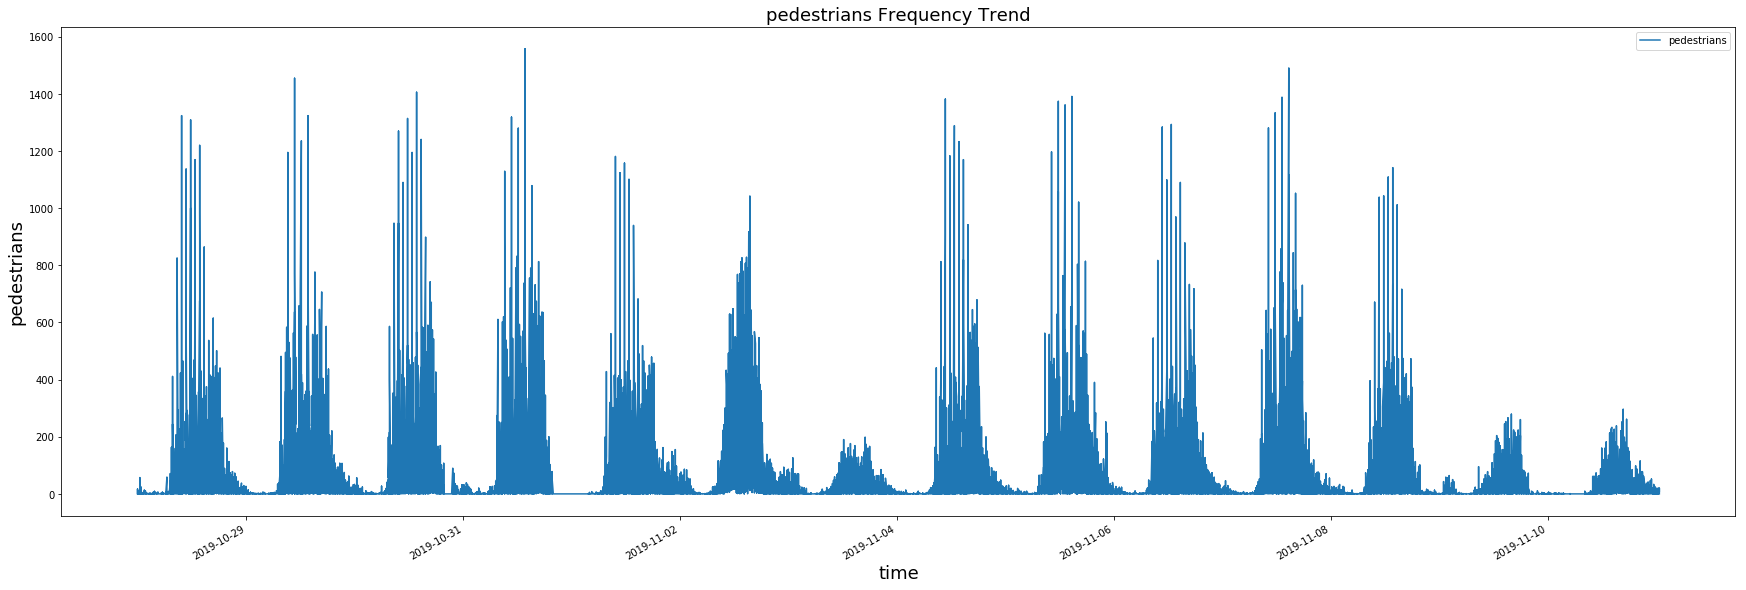

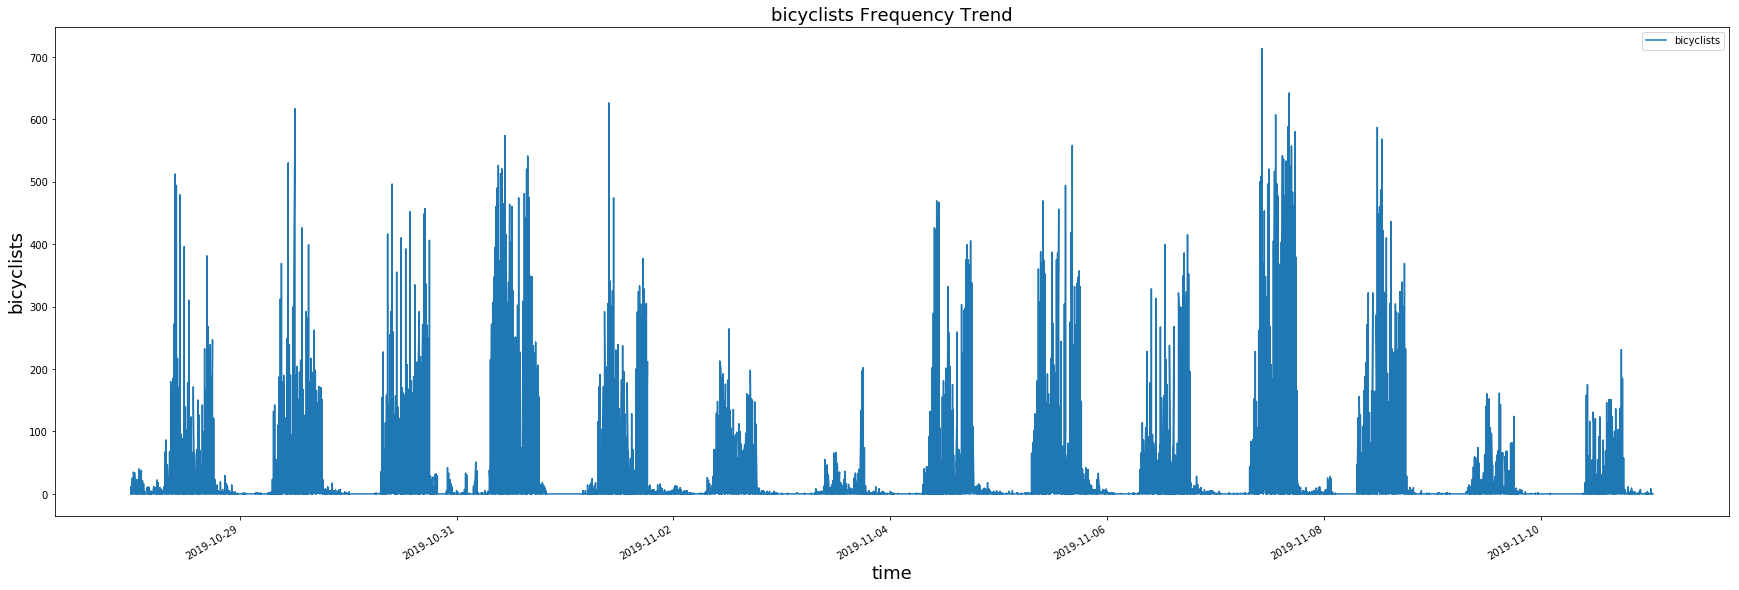

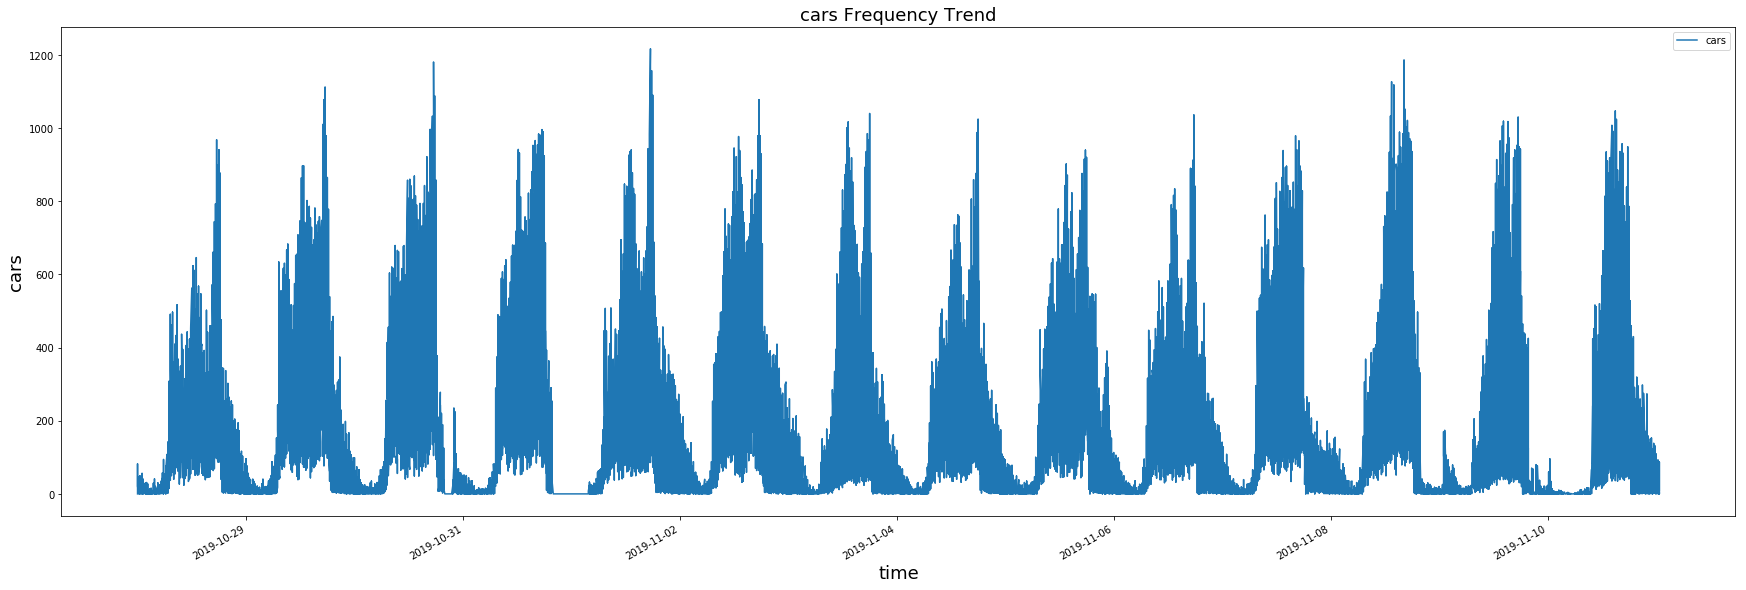

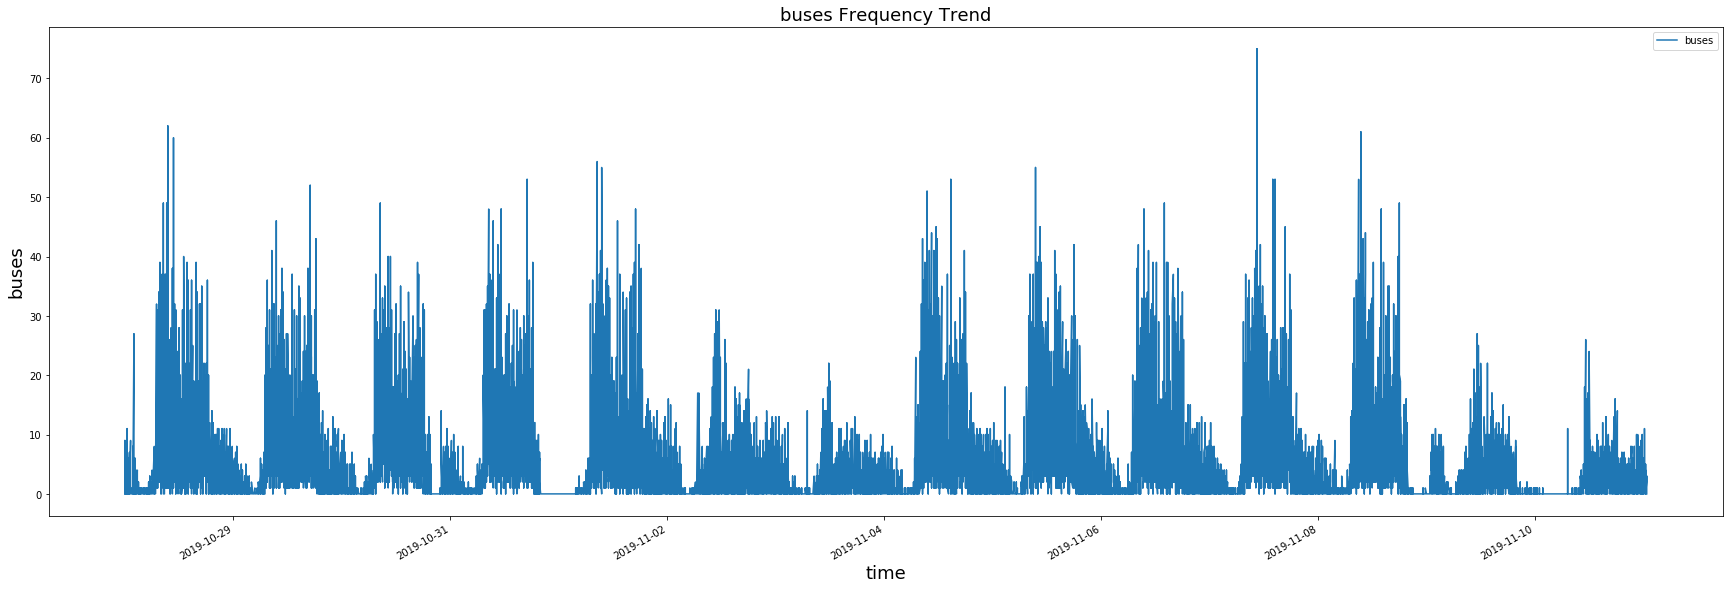

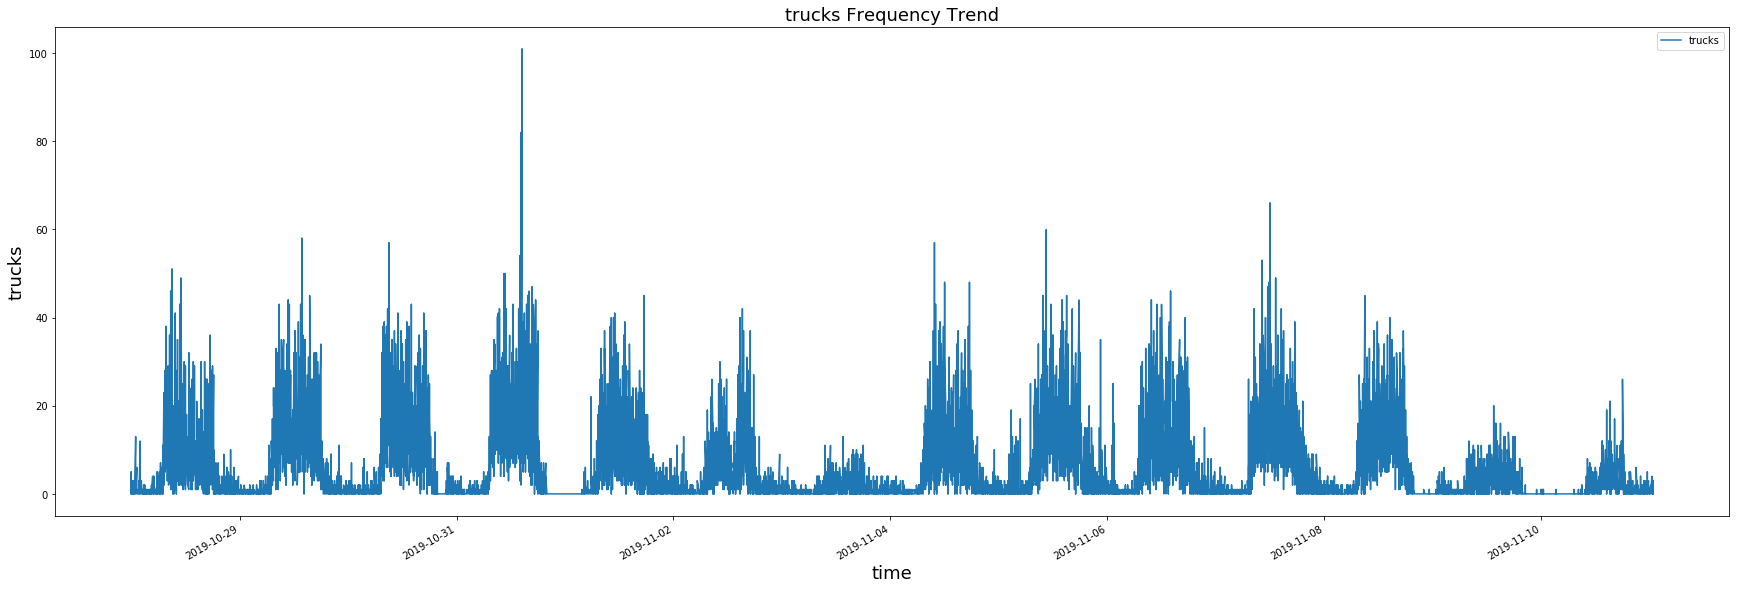

In [127]:
plt.figure(figsize=(8,30))

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots.plot(kind= 'line',x ='time', y=types,figsize = (30,10))

    plt.xlabel('time', fontsize =18)
    plt.ylabel(types,fontsize =18)
    plt.title(types + ' Frequency Trend',fontsize =18, color = "k")
    plt.savefig("figs/" + types +".png",dpi=100) 
    plt.show()


### Q1
### Pedestrans and bicyclists have clearly pattern. The frequency is high during weekdays and less during weekends. These two modes are basically main ways to commute inside the campus.
### Trend of cars is pretty flat during a week, even more for the last three days.
### Trucks


Pedestrans num during 10-28-2010

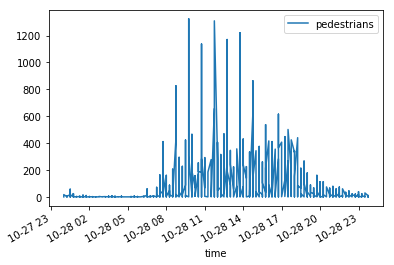

In [129]:
Dots[Dots['Date']=='2019-10-28'].plot(x='time',y='pedestrians')

In [ ]:
Dots[Dots['Date']=='2019-10-28']['pedestrians'].sum()

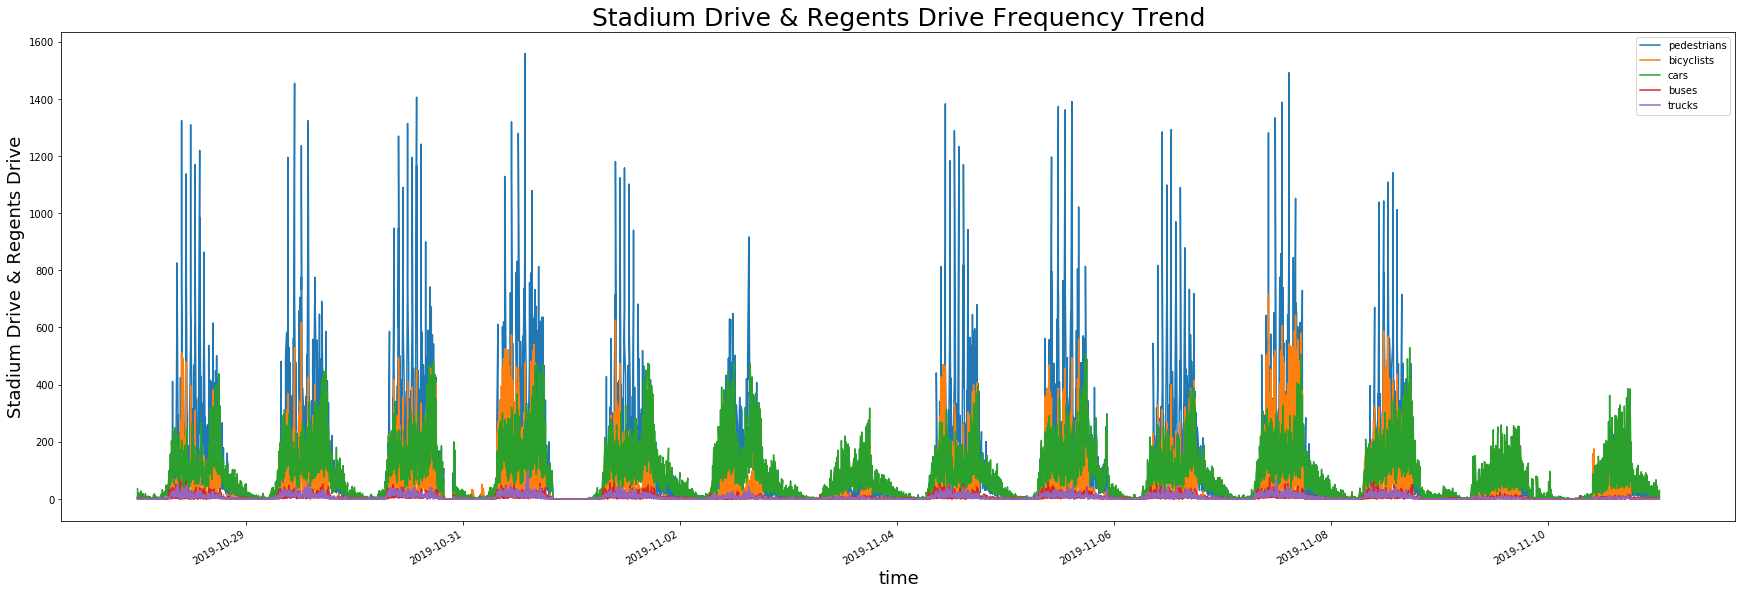

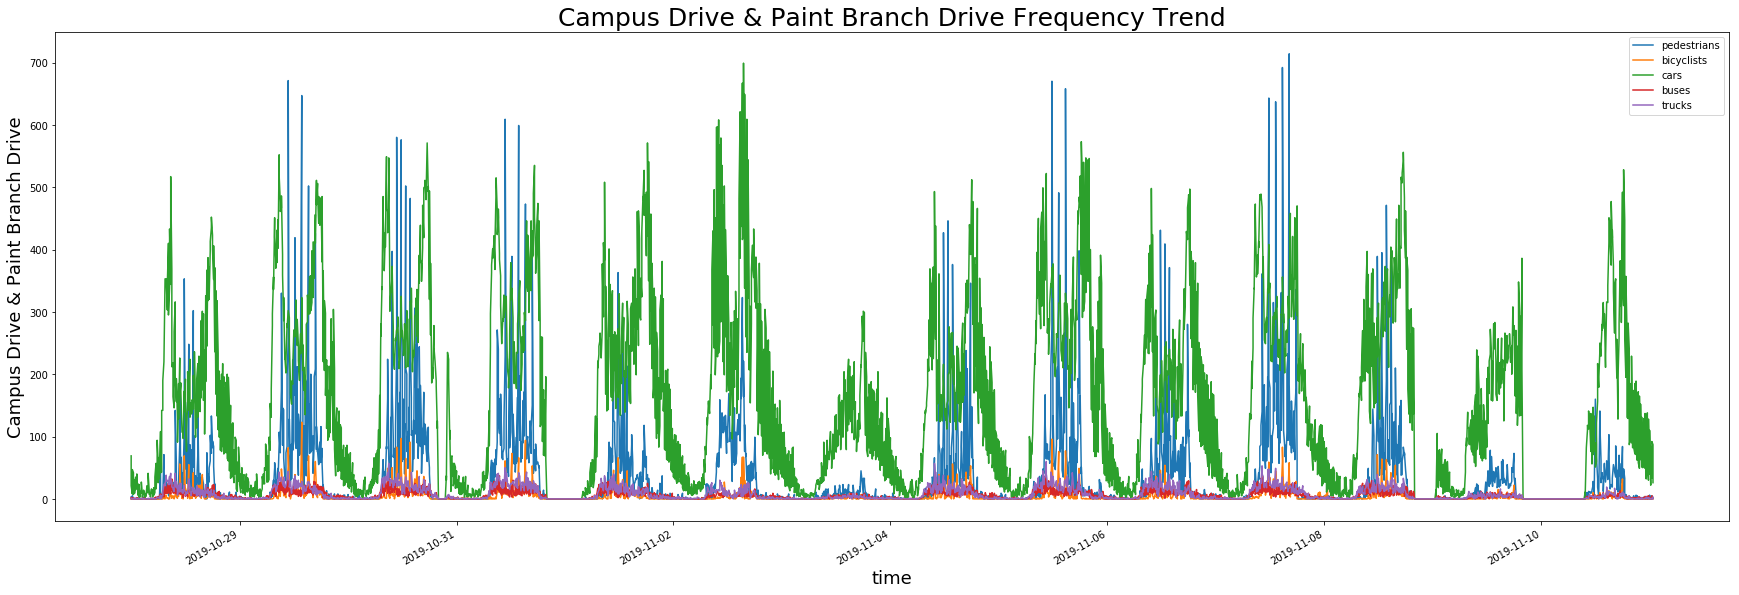

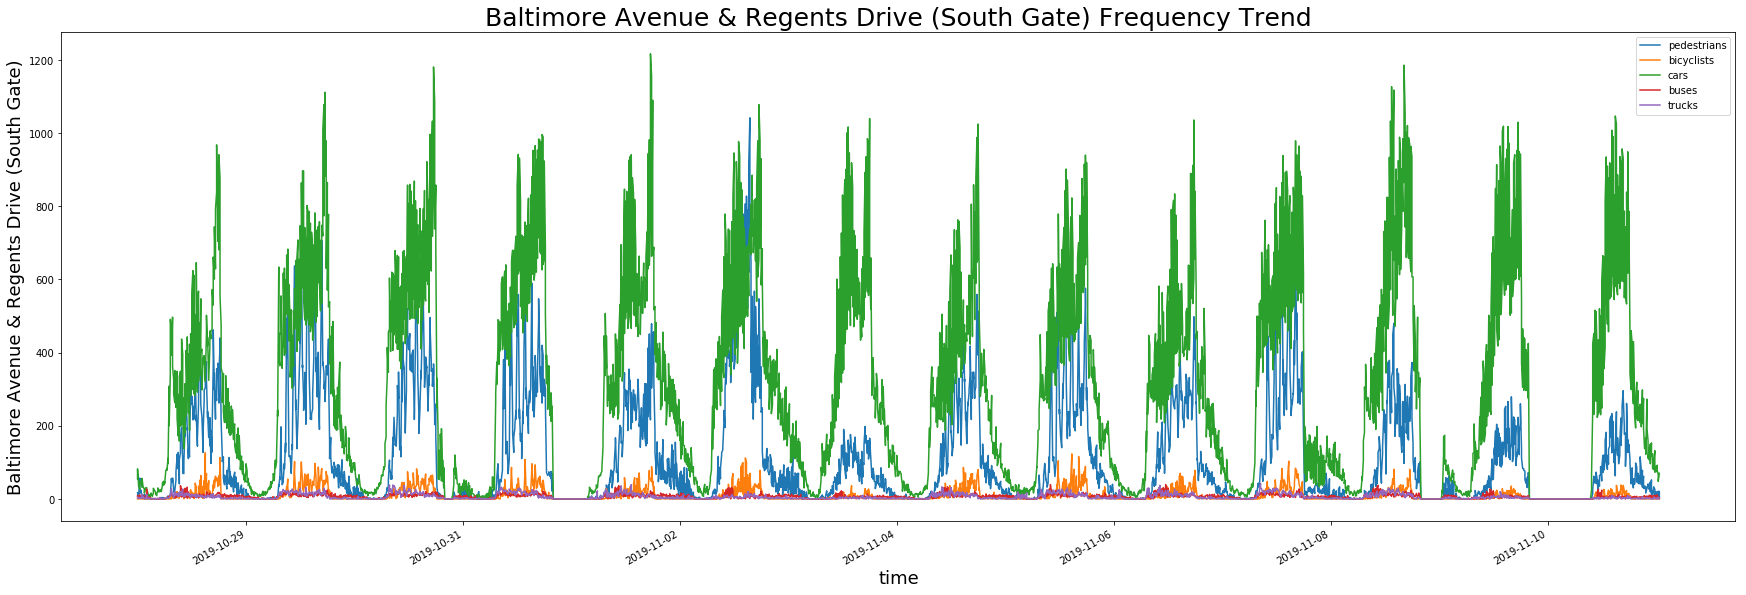

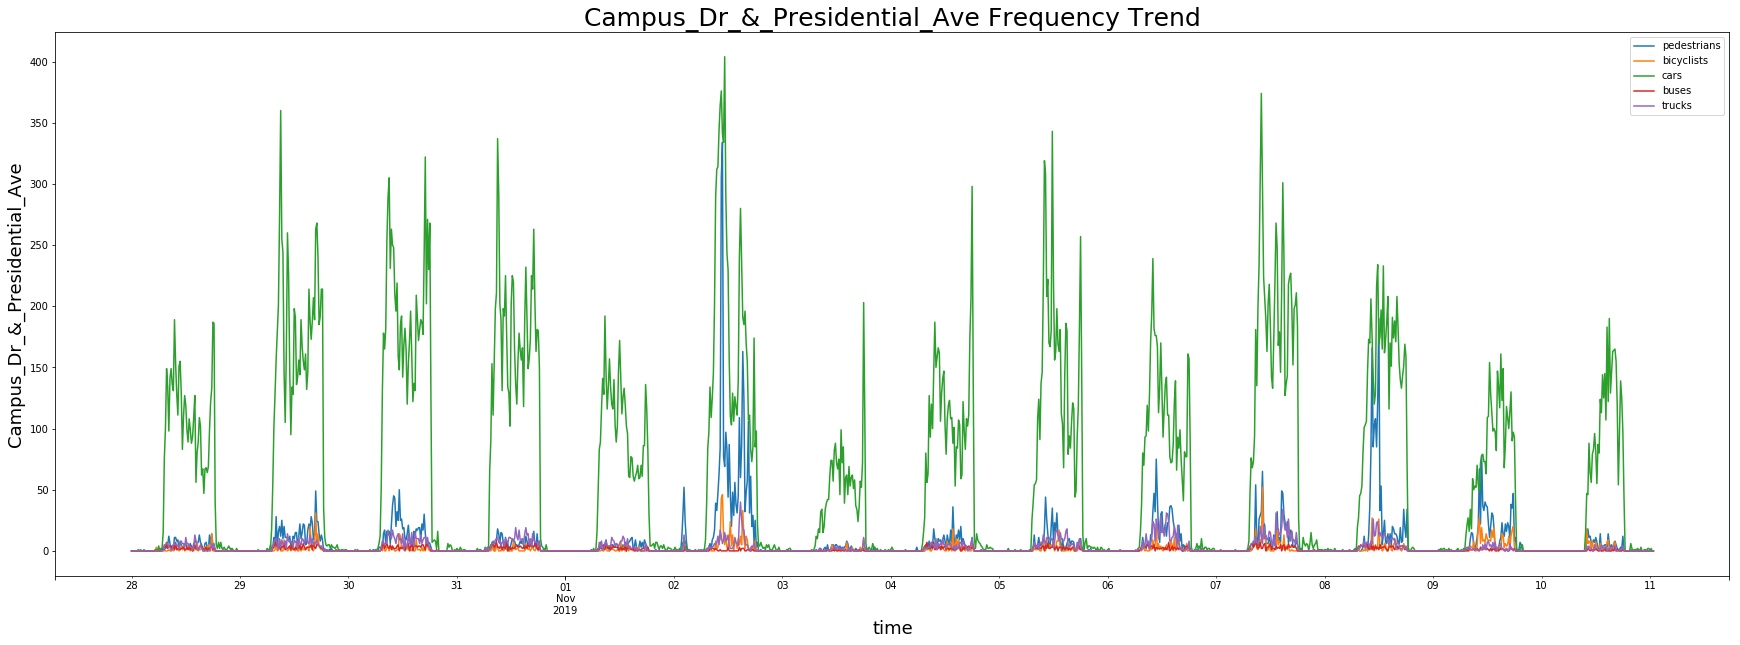

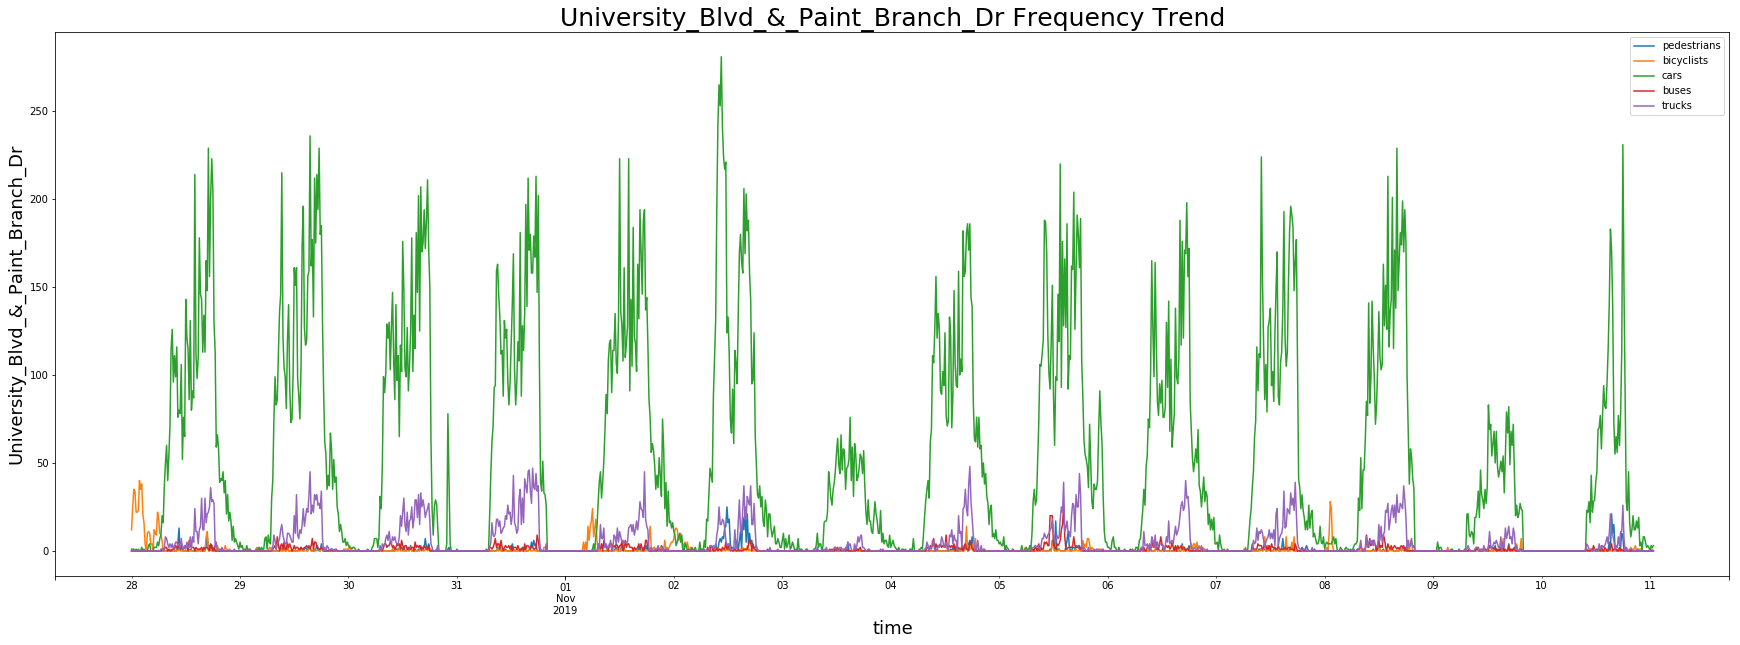

In [132]:
location_list = ['Stadium Drive & Regents Drive','Campus Drive & Paint Branch Drive',
                'Baltimore Avenue & Regents Drive (South Gate)','Campus_Dr_&_Presidential_Ave',
                 'University_Blvd_&_Paint_Branch_Dr']

for loc in location_list: 
    Dots[Dots['location_5']== loc].plot(kind = 'line', y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                        x = 'time',figsize = (30,10))
    plt.xlabel('time', fontsize =18)
    plt.ylabel(loc,fontsize =18)
    plt.title(loc + ' Frequency Trend',fontsize =25, color = "k")
    #plt.savefig("figs/" + loc +".png",dpi=100) 
    plt.show()